In [2]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
import time

# Load in Images

A string of thie file path containing the chest x-ray training data is assigned to DATADIR. Within the file path or the two folders. One folder has normal chest xray photos and another folder has chest xrays of people with pneumonia.

In [4]:
DATADIR = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']

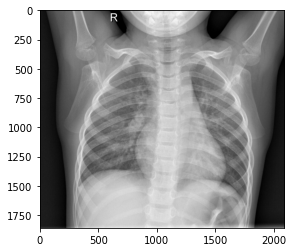

In [5]:
#iterate through all images in the two folders
for category in CATEGORIES: 
    path = os.path.join(DATADIR, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        DATADIR, 
        target_size=(224, 224), 
        batch_size = 5232, 
        seed = 123) 

Found 5216 images belonging to 2 classes.


In [7]:
#split images and labels
images, labels = next(data_all)

In [8]:
images[0][0][0]

array([0.227451, 0.227451, 0.227451], dtype=float32)

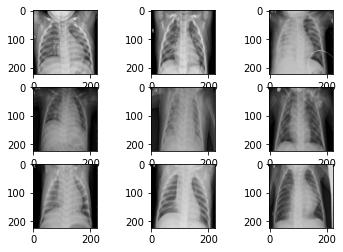

In [9]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i])
plt.show()

In [10]:
#reshape labels

labels = np.reshape(labels[:,0], (5216,1))

In [11]:
#training and testing
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [12]:
#training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# Convolutional Neural Network

In [13]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3))) #3 x 3 shape of filter
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [14]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Epoch 1/5
67/67 [==============================] - 229s 3s/step - loss: 0.6099 - acc: 0.7419 - val_loss: 0.4487 - val_acc: 0.7473
Epoch 2/5
67/67 [==============================] - 243s 4s/step - loss: 0.4667 - acc: 0.7500 - val_loss: 0.4108 - val_acc: 0.7593
Epoch 3/5
67/67 [==============================] - 236s 4s/step - loss: 0.3523 - acc: 0.8586 - val_loss: 0.2801 - val_acc: 0.8563
Epoch 4/5
67/67 [==============================] - 245s 4s/step - loss: 0.2747 - acc: 0.8932 - val_loss: 0.5636 - val_acc: 0.7281
Epoch 5/5
67/67 [==============================] - 218s 3s/step - loss: 0.2752 - acc: 0.8858 - val_loss: 0.3374 - val_acc: 0.8443


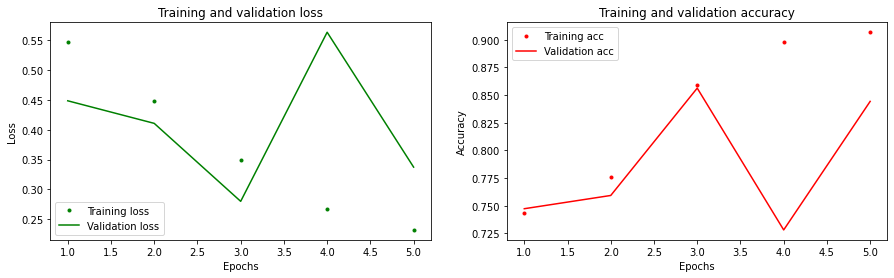

In [15]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

33/33 [==============================] - 17s 528ms/step - loss: 0.3701 - acc: 0.8352
[0.3618968725204468, 0.844171404838562] [0.37009888887405396, 0.8352490663528442]


In [ ]:
from keras.models import load_model

In [ ]:
model.save('CNN1.h5')

# Transfer Learning

In [17]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [18]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(1,activation='sigmoid')) #final layer with softmax activation

In [19]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

0 input_1 True
1 conv2d_2 True
2 batch_normalization True
3 activation True
4 conv2d_3 True
5 batch_normalization_1 True
6 activation_1 True
7 conv2d_4 True
8 batch_normalization_2 True
9 activation_2 True
10 max_pooling2d_2 True
11 conv2d_5 True
12 batch_normalization_3 True
13 activation_3 True
14 conv2d_6 True
15 batch_normalization_4 True
16 activation_4 True
17 max_pooling2d_3 True
18 conv2d_10 True
19 batch_normalization_8 True
20 activation_8 True
21 conv2d_8 True
22 conv2d_11 True
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 True
26 activation_9 True
27 average_pooling2d True
28 conv2d_7 True
29 conv2d_9 True
30 conv2d_12 True
31 conv2d_13 True
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 True
37 activation_7 True
38 activation_10 True
39 activation_11 True
40 mixed0 True
41 conv2d_17 True
42 batch_normalization_15 True
43 activation_15 True
44 conv2d_15 T

In [20]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 True
1 global_average_pooling2d True
2 dense_2 True
3 dense_3 True
4 dense_4 True
5 dense_5 True


In [21]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [22]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 False
1 global_average_pooling2d True
2 dense_2 True
3 dense_3 True
4 dense_4 True
5 dense_5 True


In [23]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=50,
          validation_data=(X_val, y_val))

Epoch 1/10
67/67 [==============================] - 265s 4s/step - loss: 0.7220 - accuracy: 0.7720 - val_loss: 0.1835 - val_accuracy: 0.9210
Epoch 2/10
67/67 [==============================] - 248s 4s/step - loss: 0.1497 - accuracy: 0.9421 - val_loss: 0.1669 - val_accuracy: 0.9389
Epoch 3/10
67/67 [==============================] - 286s 4s/step - loss: 0.1170 - accuracy: 0.9579 - val_loss: 0.1552 - val_accuracy: 0.9377
Epoch 4/10
67/67 [==============================] - 317s 5s/step - loss: 0.1026 - accuracy: 0.9630 - val_loss: 0.1739 - val_accuracy: 0.9377
Epoch 5/10
67/67 [==============================] - 317s 5s/step - loss: 0.1126 - accuracy: 0.9546 - val_loss: 0.1512 - val_accuracy: 0.9437
Epoch 6/10
67/67 [==============================] - 309s 5s/step - loss: 0.0738 - accuracy: 0.9746 - val_loss: 0.1781 - val_accuracy: 0.9353
Epoch 7/10
67/67 [==============================] - 299s 4s/step - loss: 0.0924 - accuracy: 0.9650 - val_loss: 0.1925 - val_accuracy: 0.9222
Epoch 8/10
67

In [ ]:
model.save('transferlearning')

In [24]:
new_model.evaluate(X_test, y_test)

33/33 [==============================] - 107s 3s/step - loss: 0.1126 - accuracy: 0.9636


[0.1125943660736084, 0.9636015295982361]

In [25]:
predictions_transfer = new_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [ ]:
#make predictions using your model 
#my_prediction = my_model.predict(x_test)

In [26]:
f1_score(y_test, predictions_transfer)

0.9306569343065695

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[751  25]
 [ 13 255]]


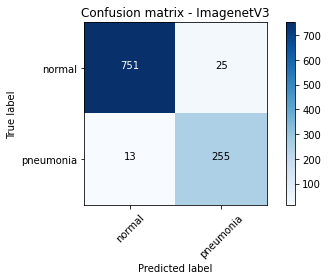

In [28]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['normal', 'pneumonia'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

In [29]:
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(224, 224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return predict

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [ ]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [ ]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [ ]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

In [ ]:
test_x, test_y = next(test_generator)

In [ ]:
results_test = model.evaluate(test_x, test_y)

In [ ]:
results_test

# From Deep Learning II

In [ ]:
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

batch_size = 6
num_classes = 10
epochs = 2

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# specify the second layer
model.add(Dense(50, activation='relu'))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

save and re-use your model by using the following code:

In [ ]:
from keras.models import load_model

In [ ]:
model.save('')